# Data Analytics & Machine Learning Using The Titanic Dataset

### Setting Up
### Loading the Required Libraries

I import the necessary libraries needed for the analysis and Machine Learning in this section

In [4]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tarfile
import urllib
from zipfile import ZipFile

In [5]:
file_name = 'titanic-dataset.zip'
with ZipFile(file_name, 'r') as file:
    file.extractall()

In [7]:
df = pd.read_csv('titanic_train.csv')
df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [8]:
df.columns

Index(['passenger_id', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest',
       'survived'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           676 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


This dataset contains 850 enteries with 15 attributes. A number of the attributes contain null values.

We can see that the datset contains 15 attributes. A couple of the attributes are not really required for our analysis or model. We will drop some of these columns and zero in on those that are really necessary

### Dataset Attributes
The dataset have the following columns with a brief on what they mean:

- passenger_id: a unique identifier for each passenger
- survived: a binary variable indicating whether the passenger survived (1) or did not survive (0)
- pclass: the passenger's class (1 = first class, 2 = second class, 3 = third class)
- name: the passenger's name
- sex: the passenger's gender
- age: the passenger's age
- sibsp: the number of siblings/spouses the passenger had on board
- parch: the number of parents/children the passenger had on board
- ticket: the passenger's ticket number
- fare: the fare the passenger paid for their ticket
- cabin: the cabin number of the passenger
- embarked: the port at which the passenger boarded the ship (C = Cherbourg, Q = Queenstown, S = Southampton)
- home.dest: The destination of the passenger.
- boat: The lifeboat number that the passenger was rescued from, or "NA" if the passenger did not survive.
- body: The body identification number of the passenger, if the passenger was recovered after the sinking. If the passenger was not recovered, this column will contain "NA".

## Planning the Data Exploration and Cleaning Steps

I will explore the dataset to familiarize myself with it and to find the problems in it. No data cleaning will be done at this stage. After identification of all the problems, I will proceed to clean the dataset.

During the exploration stage, the attributes that are not relevant will not be explored since we'll be dropping them later on in the analysis. The focus of this exploratory stage will be on the relevant attributes

## Exploratory Data Analysis

### Passenger Class

Below, we plot a chart of the passenger class.

### Plot Untility Function

Because we are going to be plotting a lot of bar charts, I define a function below to automate the process of plotting bar charts.

In [75]:
def xplore_attr(df, attr, width=0.5, img_size=[5,3], color=None, rotation=None, xlabel=None, ylabel=None, title=None):
    """
    This function will plot attributes of the dataset for exploration
    INPUT: img_size:tuple - the size of the chart to be plotted.
           df:dataframe - the dataframe to plot from.
           attr:var - the attribute column to plot from.
           x - the x-axis to plot.
           y - the y-axis to plot
           color - color of the bars
           rotation - rotation of the xtick marks
           xlabel - label for the x-axis
           ylabel - label for the y-axis
           title - the title of the plot/chart
    OUTPUT: A bar chart showing the attributes of the dataframe plotted.
    """
    
    plt.figure(figsize=img_size)
    x = df[attr].value_counts().index
    y = df[attr].value_counts().values
    plt.bar(range(len(list(x))), y, color=color, width=width)
    plt.xticks(ticks=range(len(list(x))), labels=list(x), rotation=rotation)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.title(title, fontsize=14);

### Passenger Class

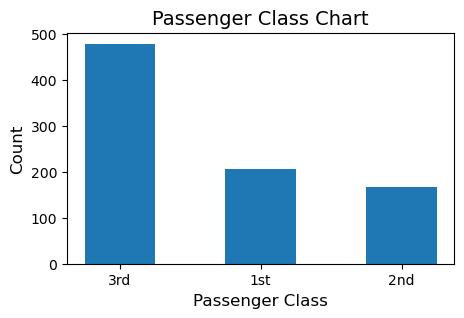

In [74]:
xplore_attr(df,'pclass', xlabel='Passenger Class', ylabel='Count', title='Passenger Class Chart')
plt.xticks(ticks=range(3), labels=['3rd', '1st', '2nd']);

There are more people in the 3rd class than the 1st and 2nd classes combined.

Although this attribute is of integer data type, we will not be performing any kind of computation with it. However, we leave it as integer because Machine learning algorithms prefer it that way.

### Passenger Sex

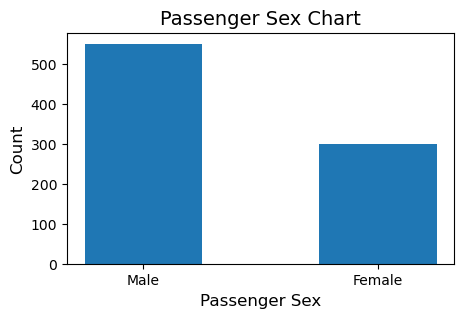

In [78]:
xplore_attr(df, 'sex', xlabel='Passenger Sex', ylabel='Count', title='Passenger Sex Chart')
plt.xticks(ticks=range(2), labels=['Male', 'Female']);

Also, we see that there are a lot more males in the dataset than females

### Passenger Age

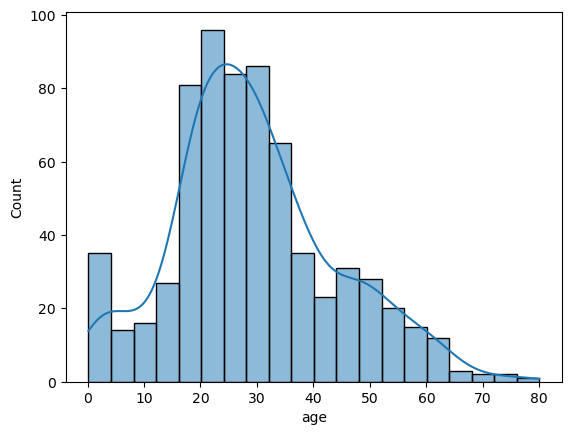

In [97]:
sns.histplot(data=df, x='age', bins=20, kde=True);

In [90]:
df['age_cat'] = pd.cut(df['age'], bins=[0, 17, 60, np.inf], labels=['children', 'adult', 'elderly'])

In [91]:
df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived,age_cat
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1,NaN
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0,adult
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0,adult
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1,adult
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0,adult


### Passenger Sibling/Spouse

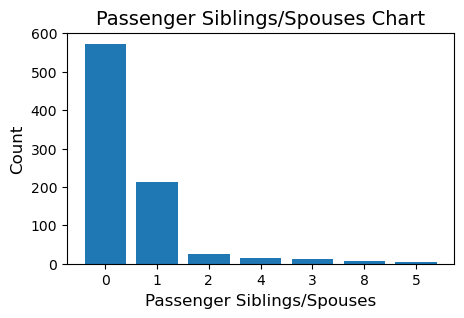

In [96]:
xplore_attr(df, 'sibsp', width=0.8, xlabel='Passenger Siblings/Spouses', ylabel='Count', 
            title='Passenger Siblings/Spouses Chart')

More than half of the people didn't have siblings and/or spouses. Could there be a relationship between not having siblings and/or spouse and survival? Could the number of siblings and/or spouse affect the chances of survival?

What we'll do is to divide this attribute into two categories - have sibling/spouse and those that don't

In [99]:
df['sib_sps'] = df['sibsp'].map(lambda x:x if x==0 else 1)
df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived,age_cat,sib_sps
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1,NaN,0
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0,adult,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0,adult,1
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1,adult,1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0,adult,0


### Parent and Children

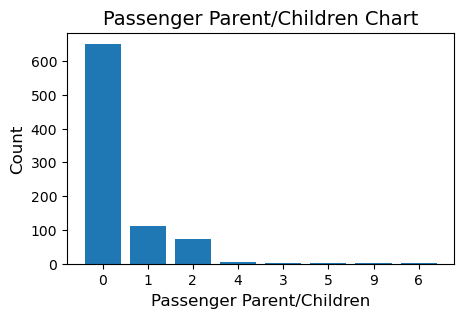

In [101]:
xplore_attr(df, 'parch', width=0.8, xlabel='Passenger Parent/Children', ylabel='Count', 
            title='Passenger Parent/Children Chart');

As before, we can see that there are more people without Parents or Children on board. Did this increase their chances of survival? Is there a relationship between having children and/or a spouse on board increase the chances of getting a life boat?
Just as we did with the siblings and spouses column, we will add a column to our dataset to show those that had at least a child or spouse on board and those that doesn't.

In [102]:
df['par_chd'] = df['parch'].map(lambda x:x if x==0 else 1)
df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived,age_cat,sib_sps,par_chd
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1,NaN,0,0
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0,adult,0,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0,adult,1,1
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1,adult,1,1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0,adult,0,0


### Passenger Fare

C:\Users\degol\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


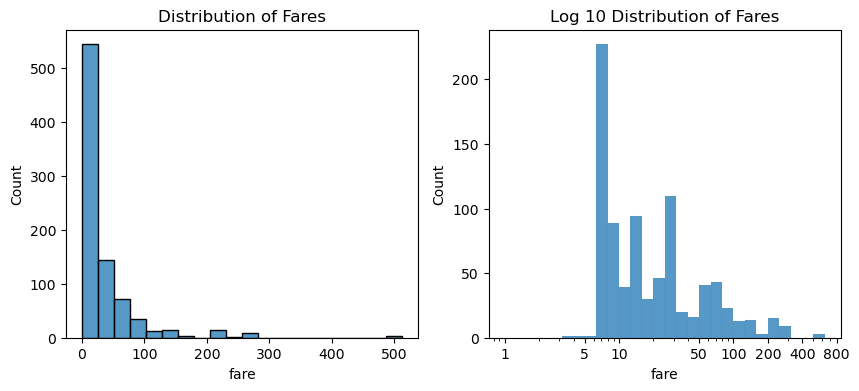

In [138]:
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
sns.histplot(data=df, x='fare', bins=20);
plt.title('Distribution of Fares');


plt.subplot(1,2,2)
bins = 10**np.arange(0, np.log10(df.fare).max()+0.1, 0.1)
sns.histplot(data=df, x='fare', bins=bins);
plt.xscale('log');
locs = [1,5,10,50,100,200,400, 800]
labels = [str(v) for v in locs]
plt.xticks(ticks=locs, labels=labels)
plt.title('Log 10 Distribution of Fares');

After performing a log transformation on the Passengers fare, we can see that most people pid between 5 dollars and about 200 dollars. There are very few people that paid more or less.

### Passenger Embark Location

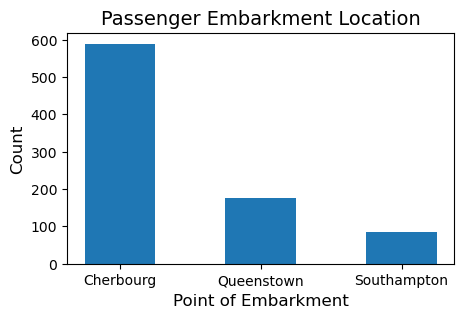

In [143]:
xplore_attr(df, 'embarked', xlabel='Point of Embarkment', ylabel='Count', title='Passenger Embarkment Location')
plt.xticks(ticks=range(3), labels=['Cherbourg', 'Queenstown', 'Southampton']);

There are more people who embarked from Cherbourg than any other location.

### Used Boat

In [150]:
df['usd_boat'] = df['boat'].map(lambda x:0 if pd.isna(x) else 1)
df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived,age_cat,sib_sps,par_chd,usd_boat
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1,NaN,0,0,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0,adult,0,0,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0,adult,1,1,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1,adult,1,1,1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0,adult,0,0,0


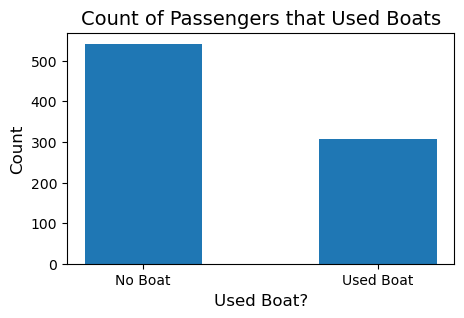

In [152]:
xplore_attr(df, 'usd_boat', xlabel='Used Boat?', ylabel='Count', title='Count of Passengers that Used Boats')
plt.xticks(ticks=range(2), labels=['No Boat', 'Used Boat']);

Obviously, there are more people that used boats than those that had no access to boats. This is necessary because I want to explore which set of people were given access to boats - were they women and children mostly or were they people from 1st and 2nd class? Perhaps more elderly people were given access to life boats compared to younger people. 

In [11]:
# Issues

# passenger_id column will be dropped. 
# name will be dropped
# age has null columns. We will investigate those further
# divide the age into categories
# remove the cabin column
# remove the body column
# remove the home.dest column


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           676 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


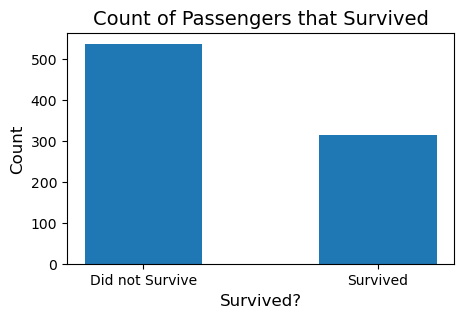

In [154]:
xplore_attr(df, 'survived', xlabel='Survived?', ylabel='Count', title='Count of Passengers that Survived')
plt.xticks(ticks=range(2), labels=['Did not Survive', 'Survived']);

In [ ]:
Obviously more people died compared to those that survived.